Original Audio:


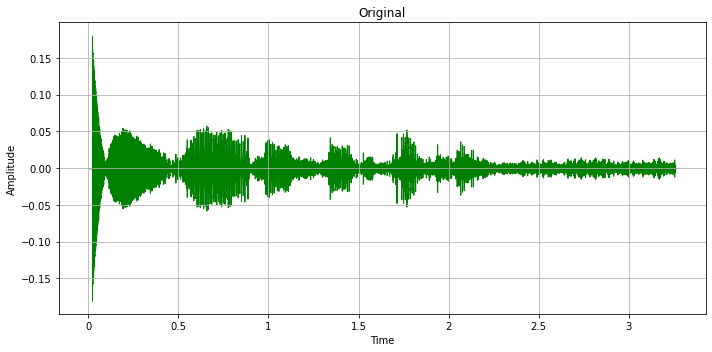

Trimmed Audio:


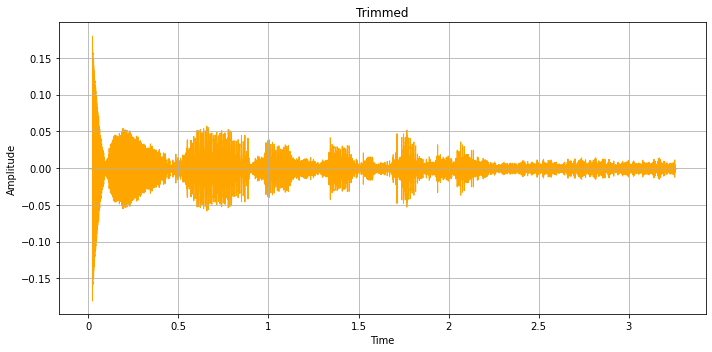

In [3]:
#1

import librosa
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

original_audio, sr = librosa.load('AIspeech.wav', sr=None)
trimmed_audio, index = librosa.effects.trim(original_audio)
sf.write('trimmed_audio.wav', trimmed_audio, sr)
trimmed,sr1 = librosa.load('trimmed_audio.wav',sr = None)

print("Original Audio:")
ipd.display(ipd.Audio(original_audio, rate=sr))

plt.figure(figsize=(10, 5))
librosa.display.waveshow(original_audio, sr=sr,color='green')
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Trimmed Audio:")
ipd.display(ipd.Audio(trimmed_audio, rate=sr))

plt.figure(figsize=(10, 5))
librosa.display.waveshow(trimmed, sr=sr1,color='orange')
plt.title('Trimmed')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

Splitting with top_db=1


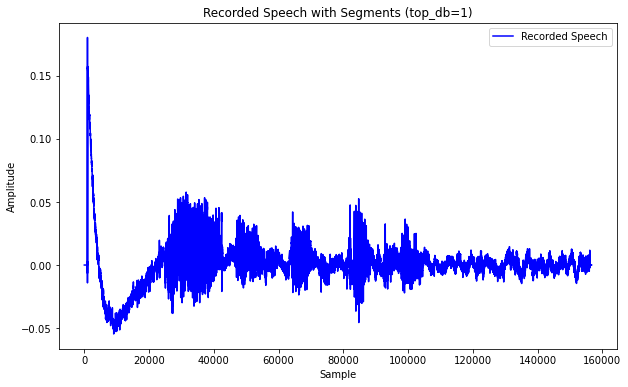

Splitting with top_db=10


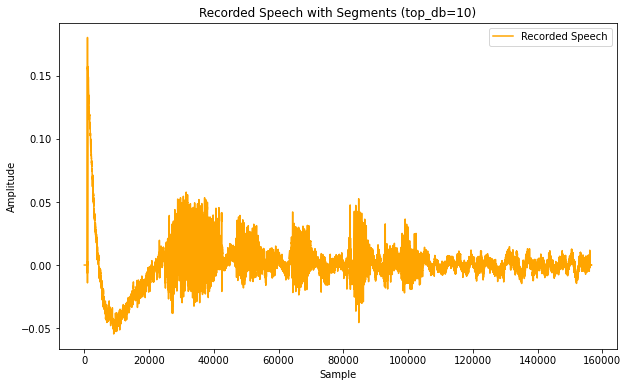

Splitting with top_db=20


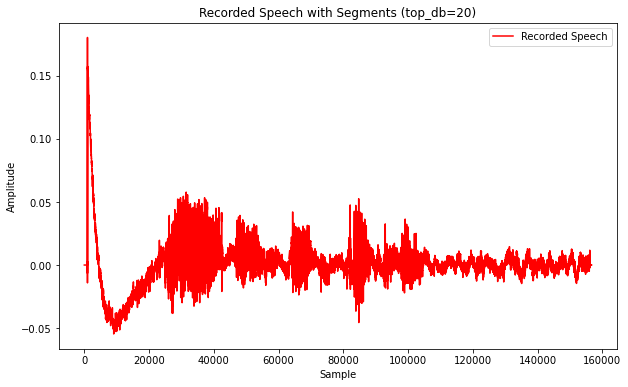

Splitting with top_db=40


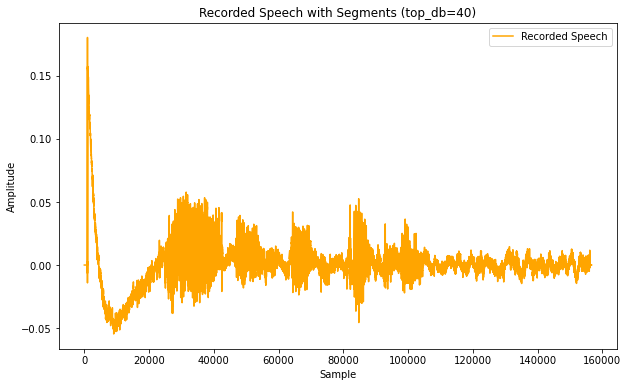

Listening to segments with top_db=1:


Listening to segments with top_db=10:


Listening to segments with top_db=20:


Listening to segments with top_db=40:


In [6]:
import librosa
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt

recorded_speech, sr = librosa.load('AIspeech.wav', sr=None)

def split_and_save(top_db):
    segments = librosa.effects.split(recorded_speech, top_db=top_db)
    colors = ['blue', 'red', 'green', 'orange']
    plt.figure(figsize=(10, 6))
    plt.plot(recorded_speech, color=random.choice(colors), label='Recorded Speech')

    for i, segment in enumerate(segments):
        start, end = segment
        segment_audio = recorded_speech[start:end]
        sf.write(f'segment_{i}.wav', segment_audio, sr)

    plt.title(f"Recorded Speech with Segments (top_db={top_db})")
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

top_db_values = [1, 10, 20, 40]

for top_db in top_db_values:
    print(f"Splitting with top_db={top_db}")
    split_and_save(top_db)


for i, top_db in enumerate(top_db_values):
    print(f"Listening to segments with top_db={top_db}:")
    for j in range(len(librosa.effects.split(recorded_speech, top_db=top_db))):
        ipd.display(ipd.Audio(f'segment_{j}.wav'))


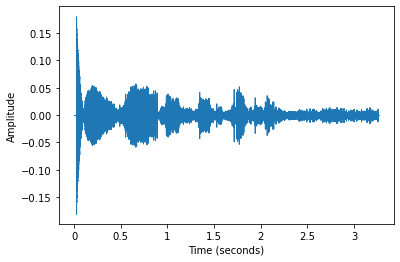

(257, 613)


80.0

In [13]:
signal, sr = librosa.load('AIspeech.wav', sr=None)
from librosa import display
import matplotlib.pyplot as plt 
plt.figure()
librosa.display.waveshow(y=signal, sr=sr) 
plt.xlabel("Time (seconds)") 
plt.ylabel("Amplitude") 
plt.show()

n_fft = 512
S= librosa.stft(signal, n_fft=n_fft, hop_length=n_fft//2)
print(S.shape)
D = librosa.amplitude_to_db(np.abs(S), ref=np.max) 
np.max(abs(D))

In [14]:
noMute = librosa.effects.split(signal)
noMute

array([[     0, 156672]])

In [15]:
def displayTime(startFrame, endFrame):    
    print(' start time: ' + str(startFrame/sr) + ', end time: ' + str(endFrame/sr))
for i in noMute:
    displayTime(i[0],i[1])

 start time: 0.0, end time: 3.264


 start time: 0.0, end time: 3.264


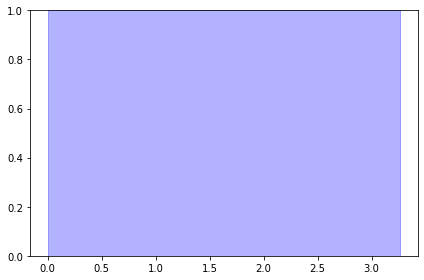

In [16]:
for i, (start, end) in enumerate(noMute):
    displayTime(start, end)
    if i % 2 == 0:
        plt.axvspan(start/sr, end/sr, color='blue', alpha=0.3)  
    else:
        plt.axvspan(start/sr, end/sr, color='orange', alpha=0.3)  

plt.tight_layout()
plt.show()

C:\Users\UDAYBHASKER\AppData\Local\Temp\ipykernel_25036\3989634523.py:4: RuntimeWarning: divide by zero encountered in log10
  signal_db = 20 * np.log10(np.abs(signal) / max_amplitude)


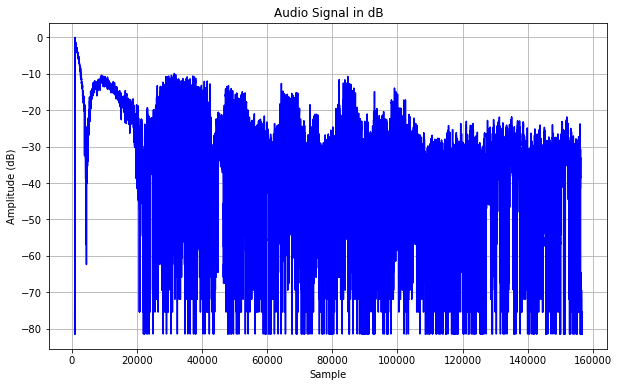

In [17]:
max_amplitude = np.max(np.abs(signal))


signal_db = 20 * np.log10(np.abs(signal) / max_amplitude)

# Plot the dB representation of the signal
plt.figure(figsize=(10, 6))
plt.plot(signal_db, color='blue')
plt.xlabel('Sample')
plt.ylabel('Amplitude (dB)')
plt.title('Audio Signal in dB')
plt.grid(True)
plt.show()